In [1]:
import sys
import csv
import os
sys.path.insert(0, '..')
import ecoscape_connectivity
from scgt import GeoTiff, Tile

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
DATA_PATH="assets"

HABITAT_PATH = os.path.join(DATA_PATH, "habitat_small.tif")
LANDCOVER_PATH = os.path.join(DATA_PATH, "terrain_small.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "terrain_permeability.csv")


In [8]:
with open(PERMEABILITY_PATH, mode='r') as infile:
    reader = csv.reader(infile)
    permeability_dict = {rows[0]:rows[1] for rows in reader}

TILED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/tiled_connectivity.tif")
TILED_FLOW_PATH = os.path.join(DATA_PATH, "Outputs/tiled_flow.tif")
SINGLE_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/single_connectivity.tif")
SINGLE_FLOW_PATH = os.path.join(DATA_PATH, "Outputs/single_flow.tif")


In [9]:
def test_connectivity_single():
    ecoscape_connectivity.compute_connectivity(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=SINGLE_CONNECTIVITY_PATH,
        flow_fn=SINGLE_FLOW_PATH,
        single_tile=True,
        border_size=50,
        num_simulations=100,
        dispersal=ecoscape_connectivity.half_cauchy(10, 40),
    )
test_connectivity_single()

Single tile


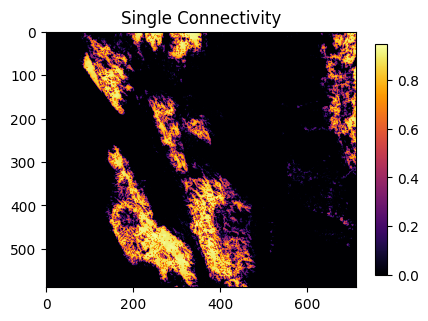

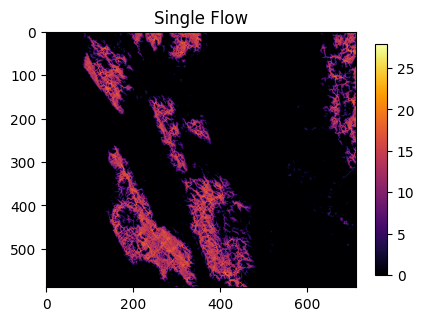

In [10]:
single_connectivity = GeoTiff.from_file(SINGLE_CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
t.draw_tile(title="Single Connectivity")
single_flow = GeoTiff.from_file(SINGLE_FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(title="Single Flow")

In [11]:
def test_connectivity():
    ecoscape_connectivity.compute_connectivity(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=TILED_CONNECTIVITY_PATH,
        flow_fn=TILED_FLOW_PATH,
        single_tile=False,
        border_size=50,
        tile_size=200,
        num_simulations=100,
        dispersal=ecoscape_connectivity.half_cauchy(10, 40),
    )
test_connectivity()

Not single tile


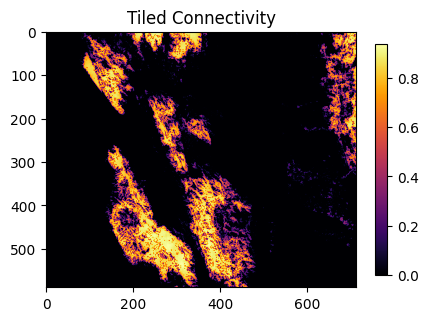

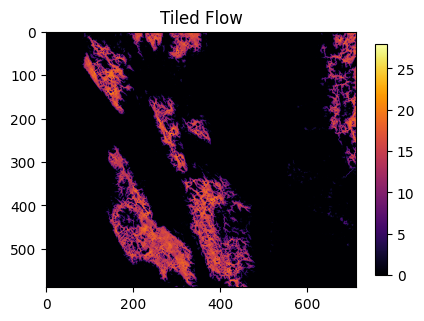

In [12]:
tiled_connectivity = GeoTiff.from_file(TILED_CONNECTIVITY_PATH)
tiled_connectivity.draw_geotiff(title="Tiled Connectivity")
tiled_flow = GeoTiff.from_file(TILED_FLOW_PATH)
tiled_flow.draw_geotiff(title="Tiled Flow")